In [83]:
import ROOT
from ROOT import TFile
from ROOT import RooDataSet, RooDataHist, RooArgSet, RooArgList, RooRealVar, RooFormulaVar, RooWorkspace
from ROOT import RooBDecay, RooTruthModel, RooFFTConvPdf, RooHistPdf, RooDecay
from ROOT import gPad , TCanvas , TPaveText , TLegend

In [84]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import zfit

In [7]:
prompt_up = ROOT.TFile.Open("root://eoslhcb.cern.ch//eos/lhcb/grid/prod/lhcb/anaprod/lhcb/LHCb/Collision24/DATA24.ROOT/00237608/0000/00237608_00000001_1.data24.root")
# data24_prompt_withut_magup
prompt_down = ROOT.TFile.Open("root://eoslhcb.cern.ch//eos/lhcb/grid/prod/lhcb/anaprod/lhcb/LHCb/Collision24/DATA24.ROOT/00237612/0000/00237612_00000001_1.data24.root")
# data24_prompt_withut_magdown

mcprompt_up = ROOT.TFile.Open("root://eoslhcb.cern.ch//eos/lhcb/grid/prod/lhcb/anaprod/lhcb/MC/2024/MC.ROOT/00237601/0000/00237601_00000001_1.mc.root")
# mc24_magup_prompt_bstojpsiphi_13144011_hlt1,2,
mcprompt_down = ROOT.TFile.Open("root://eoslhcb.cern.ch//eos/lhcb/grid/prod/lhcb/anaprod/lhcb/MC/2024/MC.ROOT/00237610/0000/00237610_00000001_1.mc.root")
# mc24_magdown_prompt_bstojpsiphi_13144011_hlt1,2,

mcdata_up = ROOT.TFile.Open("root://eoslhcb.cern.ch//eos/lhcb/grid/prod/lhcb/anaprod/lhcb/MC/2024/MC.ROOT/00237559/0000/00237559_00000001_1.mc.root")
# mc24_magup_bstojpsiphi_13144011_hlt1,2,
mcdata_down = ROOT.TFile.Open("root://eoslhcb.cern.ch//eos/lhcb/grid/prod/lhcb/anaprod/lhcb/MC/2024/MC.ROOT/00237560/0000/00237560_00000001_1.mc.root")
# mc24_magdown_bstojpsiphi_13144011_hlt1,2,


In [8]:
combined_prompt = ROOT.TChain("BsToJpsiPhi/DecayTree")  
combined_prompt.Add("./Data/data24_prompt_withut_magup_1_1.root")
combined_prompt.Add("./Data/data24_prompt_withut_magdown_1_1.root")

combined_mcprompt = ROOT.TChain("BsToJpsiPhi/DecayTree")  
combined_mcprompt.Add("root://eoslhcb.cern.ch//eos/lhcb/grid/prod/lhcb/anaprod/lhcb/MC/2024/MC.ROOT/00237601/0000/00237601_00000001_1.mc.root")
combined_mcprompt.Add("root://eoslhcb.cern.ch//eos/lhcb/grid/prod/lhcb/anaprod/lhcb/MC/2024/MC.ROOT/00237610/0000/00237610_00000001_1.mc.root")

mcdata = ROOT.TChain("BsToJpsiPhi_Detached/DecayTree")  
mcdata.Add("root://eoslhcb.cern.ch//eos/lhcb/grid/prod/lhcb/anaprod/lhcb/MC/2024/MC.ROOT/00237559/0000/00237559_00000001_1.mc.root")
mcdata.Add("root://eoslhcb.cern.ch//eos/lhcb/grid/prod/lhcb/anaprod/lhcb/MC/2024/MC.ROOT/00237560/0000/00237560_00000001_1.mc.root")


1

In [85]:
prompt_up.

TNetXNGFile**		root://eoslhcb.cern.ch//eos/lhcb/grid/prod/lhcb/anaprod/lhcb/LHCb/Collision24/DATA24.ROOT/00237608/0000/00237608_00000001_1.data24.root	
 TNetXNGFile*		root://eoslhcb.cern.ch//eos/lhcb/grid/prod/lhcb/anaprod/lhcb/LHCb/Collision24/DATA24.ROOT/00237608/0000/00237608_00000001_1.data24.root	
  KEY: TDirectoryFile	BsToJpsiPhi;1	BsToJpsiPhi
  KEY: TTree	lumiTree;1	LumiEvents Tree


In [87]:

branch_list = combined_prompt.GetListOfBranches()

for branch in branch_list:
    print(branch.GetName())

NPVs
ALLPVX
ALLPVY
ALLPVZ
BUNCHCROSSING_ID
BUNCHCROSSING_TYPE
EVENTNUMBER
GPSTIME
Hlt1D2KKDecision
Hlt1D2KPiDecision
Hlt1D2PiPiDecision
Hlt1DiMuonHighMassDecision
Hlt1DiMuonLowMassDecision
Hlt1DiMuonNoIPDecision
Hlt1DiMuonNoIP_ssDecision
Hlt1DiMuonSoftDecision
Hlt1DisplacedDiMuonDecision
Hlt1DisplacedLeptonsDecision
Hlt1GECPassthroughDecision
Hlt1KsToPiPiDecision
Hlt1LowPtDiMuonDecision
Hlt1LowPtMuonDecision
Hlt1OneMuonDecision
Hlt1OneMuonTrackLineDecision
Hlt1PassthroughDecision
Hlt1SingleHighEtDecision
Hlt1SingleHighPtMuonDecision
Hlt1TrackMVADecision
Hlt1TrackMuonMVADecision
Hlt1TwoTrackKsDecision
Hlt1TwoTrackMVACharmXSecDecision
Hlt1TwoTrackMVADecision
Hlt1_TCK
Hlt2B2CC_BdToJpsiKstar_JpsiToMuMu_DetachedDecision
Hlt2B2CC_BsToJpsiPhiDecision
Hlt2B2CC_BsToJpsiPhi_DetachedDecision
Hlt2B2CC_BsToJpsiPhi_ExtraMuonDecision
Hlt2B2CC_BsToJpsiPhi_JpsiToEE_DetachedDecision
Hlt2B2CC_BuToJpsiKplus_JpsiToMuMu_DetachedDecision
Hlt2B2OC_BdToDsmPi_DsmToKpKmPimDecision
Hlt2_TCK
NLongTracks
NPV
ODINTC

In [20]:
###################### Prompt data ###################### 

prompt_paths = [
    "root://eoslhcb.cern.ch//eos/lhcb/grid/prod/lhcb/anaprod/lhcb/LHCb/Collision24/DATA24.ROOT/00237608/0000/00237608_00000001_1.data24.root",
    "root://eoslhcb.cern.ch//eos/lhcb/grid/prod/lhcb/anaprod/lhcb/LHCb/Collision24/DATA24.ROOT/00237612/0000/00237612_00000001_1.data24.root"
]

all_data = []

for prompt_path in prompt_paths:
    with uproot.open(prompt_path) as file:
        tree = file["BsToJpsiPhi/DecayTree"] 

        branches = tree.arrays(
            ["Bs_DTF_PV_CTAU", "Bs_DTF_PV_CTAUERR"],
            library="pd"
        )

        all_data.append(branches)

combined_df_prompt = pd.concat(all_data, ignore_index=True)

In [24]:
###################### MCPrompt data ###################### 

prompt_paths = [
    "root://eoslhcb.cern.ch//eos/lhcb/grid/prod/lhcb/anaprod/lhcb/MC/2024/MC.ROOT/00237601/0000/00237601_00000001_1.mc.root",
    "root://eoslhcb.cern.ch//eos/lhcb/grid/prod/lhcb/anaprod/lhcb/MC/2024/MC.ROOT/00237610/0000/00237610_00000001_1.mc.root"
]

all_data = []

for prompt_path in prompt_paths:
    with uproot.open(prompt_path) as file:
        tree = file["BsToJpsiPhi/DecayTree"] 

        branches = tree.arrays(
            ["Bs_DTF_PV_CTAU", "Bs_DTF_PV_CTAUERR"],
            library="pd"
        )

        all_data.append(branches)

combined_df_mcprompt = pd.concat(all_data, ignore_index=True)

In [26]:
###################### MC data ###################### 

prompt_paths = [
    "root://eoslhcb.cern.ch//eos/lhcb/grid/prod/lhcb/anaprod/lhcb/MC/2024/MC.ROOT/00237559/0000/00237559_00000001_1.mc.root",
    "root://eoslhcb.cern.ch//eos/lhcb/grid/prod/lhcb/anaprod/lhcb/MC/2024/MC.ROOT/00237560/0000/00237560_00000001_1.mc.root"
]

all_data = []

for prompt_path in prompt_paths:
    with uproot.open(prompt_path) as file:
        tree = file["BsToJpsiPhi_Detached/DecayTree"] 

        branches = tree.arrays(
            ["Bs_DTF_PV_CTAU", "Bs_DTF_PV_CTAUERR"],
            library="pd"
        )

        all_data.append(branches)

combined_df_mcdata = pd.concat(all_data, ignore_index=True)

# Function

In [17]:
def process_quantiles_sig(quantiles, combined_df,cut_neg_x,cut_pos_x):
    fitting_results = []
######################### Fitting ######################### 
    for i in range(len(quantiles) - 1):
        # Data processing
        cut_df = combined_df_prompt[
            (combined_df['Bs_DTF_PV_CTAUERR'] > quantiles[i]) & 
            (combined_df['Bs_DTF_PV_CTAUERR'] < quantiles[i + 1])
        ]
        Ctau_data = cut_df['Bs_DTF_PV_CTAU']
        Ctau_data_filtered = Ctau_data[(Ctau_data >= cut_neg_x) & (Ctau_data <= cut_pos_x)]

        # to zfit
        obs = zfit.Space("Bs_DTF_PV_CTAU", limits=(cut_neg_x, cut_pos_x))
        Ctau_data_zfit = zfit.Data.from_numpy(obs=obs, array=Ctau_data_filtered.values)

        # Gauss
        mean = zfit.Parameter(f"mean_{i}", -0.06, -1, 1)
        sigma = zfit.Parameter(f"sigma_{i}", 0.1, 0, 10)
        amplitude = zfit.Parameter(f"amplitude_{i}", 1, 0, 10)
        gauss = zfit.pdf.Gauss(obs=obs, mu=mean, sigma=sigma)

        # Loss function and minimizer
        nll = zfit.loss.UnbinnedNLL(model=gauss, data=Ctau_data_zfit)
        minimizer = zfit.minimize.Minuit()

        # Fitting
        result = minimizer.minimize(nll)

        # Save fitting parameters
        sigma_val = sigma.value().numpy()
        fitting_results.append({
            "quantile_range": (quantiles[i], quantiles[i + 1]),
            "sigma": sigma_val
        })

        # Plot
        x_plot = np.linspace(-0.04, 0.04, 1000)
        y_plot = zfit.run(gauss.pdf(x_plot, norm_range=obs))

        plt.figure(figsize=(10, 6))
        plt.hist(Ctau_data_filtered, bins=300, range=(-0.05, 0.05), density=True, color='blue', alpha=0.3, label='Data')
        plt.plot(x_plot, y_plot, color='red', lw=2, label=f'Fit for quantile {quantiles[i]:.5f}-{quantiles[i + 1]:.5f}')
        plt.title(f"Bs_DTF_PV_CTAU for quantile {quantiles[i]:.5f}-{quantiles[i + 1]:.5f}")
        plt.xlabel("Error (mm)")
        plt.ylabel("Count")
        plt.legend()
        plt.grid(True)
        plt.show()
######################### Fitting parameters ######################### 
    # Collect fitted sigmas, mid bin points, and error bars
    sigmas = []
    mid_bin_point = []
    sigma_err_bar = []
    for result in fitting_results:
        print(f"Quantile range: {result['quantile_range']}, Fitted sigma: {result['sigma']}")
        sigmas.append(result['sigma'])
        sigma_err_bar.append((result['quantile_range'][1] - result['quantile_range'][0]) / 2)
        mid_bin_point.append(result['quantile_range'][0] + (result['quantile_range'][1] - result['quantile_range'][0]) / 2)
    print("--------------------------------------------------")
    data = combined_df["Bs_DTF_PV_CTAUERR"].values
    
######################### colourfull histogram ######################### 
    binned_data = []

    # go through all quantile，extract Bs_DTF_PV_CTAU
    for i in range(len(quantiles) - 1):
        cut_df = combined_df[(combined_df['Bs_DTF_PV_CTAUERR'] > quantiles[i]) & (combined_df['Bs_DTF_PV_CTAUERR'] <= quantiles[i + 1])]
        Ctau_data = cut_df['Bs_DTF_PV_CTAUERR'].values
        binned_data.append(Ctau_data)
        print(f"Bin {i+1} ({quantiles[i]:.5f} to {quantiles[i+1]:.5f}) contains {len(Ctau_data)} data points.")

    plt.figure(figsize=(10, 6))
    
    for i in range(len(binned_data)):
        plt.hist(binned_data[i], bins=1000, alpha=0.5, range=(0, 0.025), label=f'Quantile {i+1}: {quantiles[i]:.5f} - {quantiles[i+1]:.5f}')

    plt.xlabel('Bs_DTF_PV_CTAU_ERR (mm)')
    plt.ylabel('Counts')
    plt.title('Bs_DTF_PV_CTAU distribution across quantiles of Bs_DTF_PV_CTAUERR')
    plt.legend()
    plt.show()    

    return sigmas, mid_bin_point, sigma_err_bar


In [ ]:
def process_quantiles_calculation (quantiles, combined_df,cut_neg_x,cut_pos_x):
    fitting_results = []
######################### Fitting ######################### 
    for i in range(len(quantiles) - 1):
        # Data processing
        cut_df = combined_df_prompt[
            (combined_df['Bs_DTF_PV_CTAUERR'] > quantiles[i]) & 
            (combined_df['Bs_DTF_PV_CTAUERR'] < quantiles[i + 1])
        ]
        Ctau_data = cut_df['Bs_DTF_PV_CTAU']
        Ctau_data_filtered = Ctau_data[(Ctau_data >= cut_neg_x) & (Ctau_data <= cut_pos_x)]

        # to zfit
        obs = zfit.Space("Bs_DTF_PV_CTAU", limits=(cut_neg_x, cut_pos_x))
        Ctau_data_zfit = zfit.Data.from_numpy(obs=obs, array=Ctau_data_filtered.values)

        # Gauss
        mean = zfit.Parameter(f"mean_{i}", -0.06, -1, 1)
        sigma = zfit.Parameter(f"sigma_{i}", 0.1, 0, 10)
        amplitude = zfit.Parameter(f"amplitude_{i}", 1, 0, 10)
        gauss = zfit.pdf.Gauss(obs=obs, mu=mean, sigma=sigma)

        # Loss function and minimizer
        nll = zfit.loss.UnbinnedNLL(model=gauss, data=Ctau_data_zfit)
        minimizer = zfit.minimize.Minuit()

        # Fitting
        result = minimizer.minimize(nll)

        # Save fitting parameters
        sigma_val = sigma.value().numpy()
        fitting_results.append({
            "quantile_range": (quantiles[i], quantiles[i + 1]),
            "sigma": sigma_val
        })

        # Plot
        x_plot = np.linspace(-0.04, 0.04, 1000)
        y_plot = zfit.run(gauss.pdf(x_plot, norm_range=obs))

        plt.figure(figsize=(10, 6))
        plt.hist(Ctau_data_filtered, bins=300, range=(-0.05, 0.05), density=True, color='blue', alpha=0.3, label='Data')
        plt.plot(x_plot, y_plot, color='red', lw=2, label=f'Fit for quantile {quantiles[i]:.5f}-{quantiles[i + 1]:.5f}')
        plt.title(f"Bs_DTF_PV_CTAU for quantile {quantiles[i]:.5f}-{quantiles[i + 1]:.5f}")
        plt.xlabel("Error (mm)")
        plt.ylabel("Count")
        plt.legend()
        plt.grid(True)
        plt.show()
######################### Fitting parameters ######################### 
    # Collect fitted sigmas, mid bin points, and error bars
    sigmas = []
    mid_bin_point = []
    sigma_err_bar = []
    for result in fitting_results:
        print(f"Quantile range: {result['quantile_range']}, Fitted sigma: {result['sigma']}")
        sigmas.append(result['sigma'])
        sigma_err_bar.append((result['quantile_range'][1] - result['quantile_range'][0]) / 2)
        mid_bin_point.append(result['quantile_range'][0] + (result['quantile_range'][1] - result['quantile_range'][0]) / 2)
    print("--------------------------------------------------")
    data = combined_df["Bs_DTF_PV_CTAUERR"].values
    
######################### colourfull histogram ######################### 
    binned_data = []

    # go through all quantile，extract Bs_DTF_PV_CTAU
    for i in range(len(quantiles) - 1):
        cut_df = combined_df[(combined_df['Bs_DTF_PV_CTAUERR'] > quantiles[i]) & (combined_df['Bs_DTF_PV_CTAUERR'] <= quantiles[i + 1])]
        Ctau_data = cut_df['Bs_DTF_PV_CTAUERR'].values
        binned_data.append(Ctau_data)
        print(f"Bin {i+1} ({quantiles[i]:.5f} to {quantiles[i+1]:.5f}) contains {len(Ctau_data)} data points.")

    plt.figure(figsize=(10, 6))
    
    for i in range(len(binned_data)):
        plt.hist(binned_data[i], bins=1000, alpha=0.5, range=(0, 0.025), label=f'Quantile {i+1}: {quantiles[i]:.5f} - {quantiles[i+1]:.5f}')

    plt.xlabel('Bs_DTF_PV_CTAU_ERR (mm)')
    plt.ylabel('Counts')
    plt.title('Bs_DTF_PV_CTAU distribution across quantiles of Bs_DTF_PV_CTAUERR')
    plt.legend()
    plt.show()    

    return sigmas, mid_bin_point, sigma_err_bar


In [18]:
def sig_vs_sig_t(quantiles,combined_df,sigmas,mid_bin_point,sigma_err_bar):
    binned_data = []

    # go through quantile and extract Bs_DTF_PV_CTAU
    for i in range(len(quantiles) - 1):
        cut_df = combined_df[(combined_df['Bs_DTF_PV_CTAUERR'] > quantiles[i]) & (combined_df['Bs_DTF_PV_CTAUERR'] <= quantiles[i + 1])]
        Ctau_data = cut_df['Bs_DTF_PV_CTAU'].values
        binned_data.append(Ctau_data)
    
    # 计算总数据点数以进行归一化
    total_data_points = sum([len(b) for b in binned_data])

    # 创建图形
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # 绘制 sigma 曲线在左侧 y 轴上
    ax1.errorbar(mid_bin_point,sigmas,  xerr=sigma_err_bar, fmt='o', color='blue', label='Sigma (Fitted Values)')
    ax1.set_xlabel('Bs_DTF_PV_CTAU_ERR (mm)')
    ax1.set_ylabel('Sigma (Fitted Values)', color='blue')

    fit_params = np.polyfit(mid_bin_point, sigmas, 1)  
    extended_x = np.linspace(0.0025, 0.0225, 100)  
    fit_line = np.polyval(fit_params, extended_x)  
    extended_y= np.linspace(0 , 0.03, 100)

    #ax1.plot(mid_bin_point, fit_line, color='red', linestyle='-', label='Linear Fit')
    ax1.plot(extended_x, fit_line, color='k', linestyle='-', label='Linear Fit')
    ax1.plot(extended_y, extended_y, color='green', linestyle='-', label='y=x')  
    # 创建第二个 y 轴用于绘制背景直方图 (counts)，显示在右侧
    ax2 = ax1.twinx()

    # 绘制背景直方图，并归一化
    for i in range(len(binned_data)):
        bin_range = (quantiles[i+1] - quantiles[i])
        normalized_height = len(binned_data[i]) / (1.25*total_data_points * bin_range)  # 归一化高度
        ax2.bar(quantiles[i], normalized_height, width=bin_range, alpha=0.3, align='edge', label=f' {i+1}: {quantiles[i]:.4f} - {quantiles[i+1]:.4f}')

    # 设置右侧 y 轴的标签和范围
    ax2.set_ylabel('Normalized Counts (Density)', color='gray')
    ax2.set_ylim(0, 200)  # 将 counts 最大值设置为 100 或 50，根据需要调整

    # 设置 x 轴范围
    ax1.set_xlim(0, 0.025)
    ax1.set_ylim(0, 0.03)
    # 显示图例和调整布局
    fig.tight_layout()
    plt.legend()
    plt.show()


# Prompt Data

[0.00402228 0.00804341 0.00893347 0.00957227 0.01012696 0.01064467
 0.01115783 0.01169522 0.01234639 0.01333595 0.01999334]


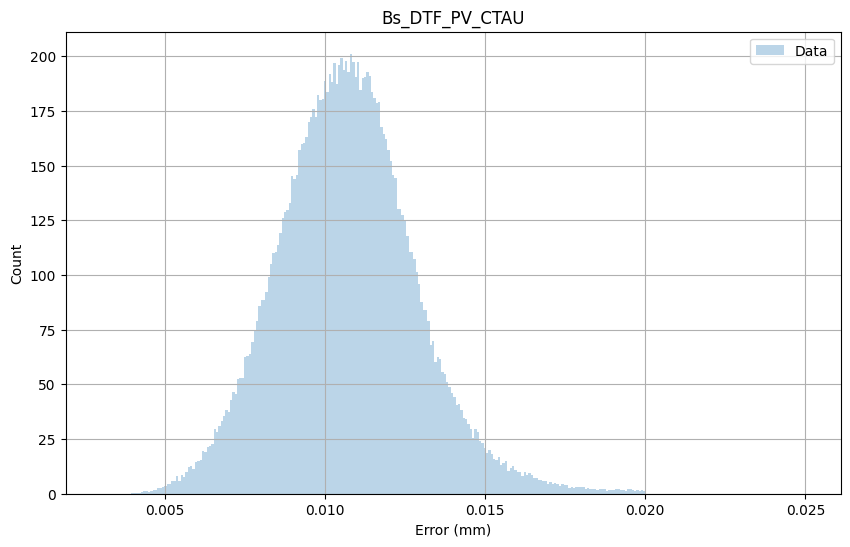

In [21]:
ini_cut = combined_df_prompt[(combined_df_prompt['Bs_DTF_PV_CTAUERR'] > 0.004) & (combined_df_prompt['Bs_DTF_PV_CTAUERR'] < 0.02)]
Ctau_data = ini_cut ['Bs_DTF_PV_CTAUERR']
quantiles = np.quantile(Ctau_data, [0,0.1, 0.2,0.3, 0.4, 0.5,0.6,0.7, 0.8,0.9,1])
print(quantiles)

plt.figure(figsize=(10, 6))
plt.hist(Ctau_data  , bins=300, range=(0.003, 0.025), density=True, alpha=0.3, label='Data')
plt.title("Bs_DTF_PV_CTAU")
plt.xlabel("Error (mm)")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.show()

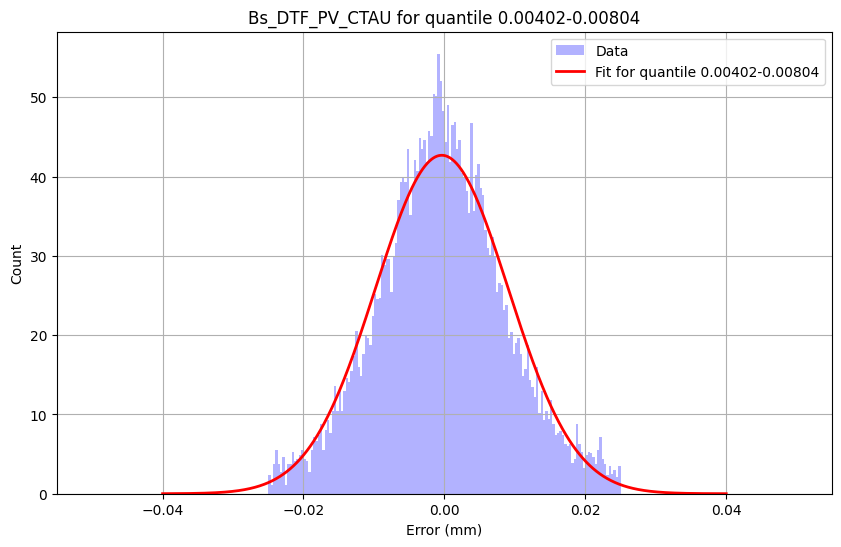

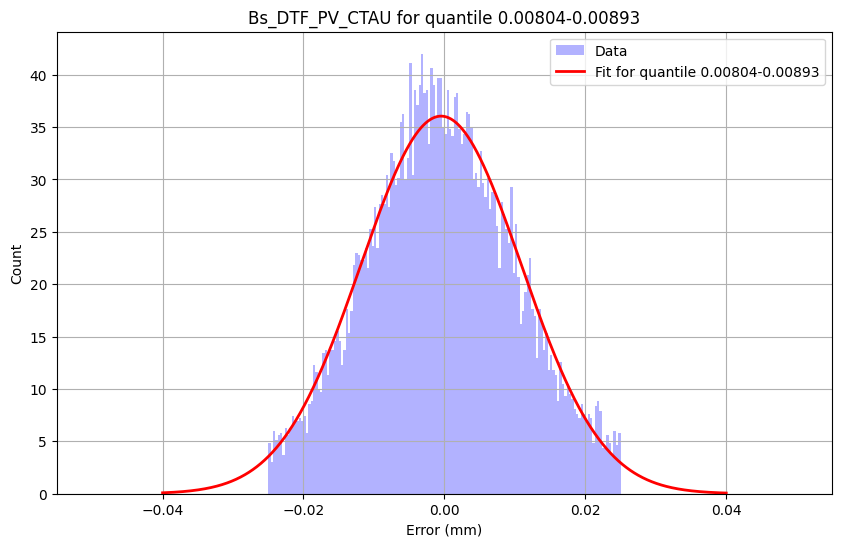

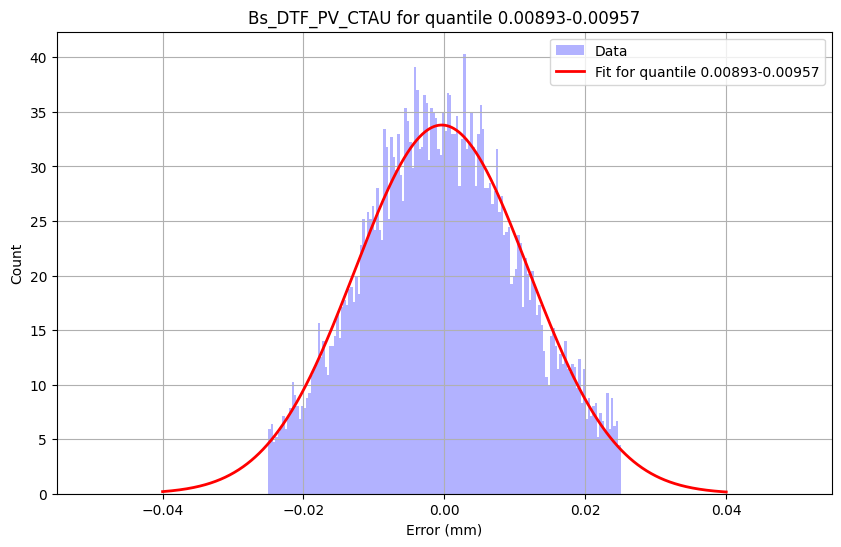

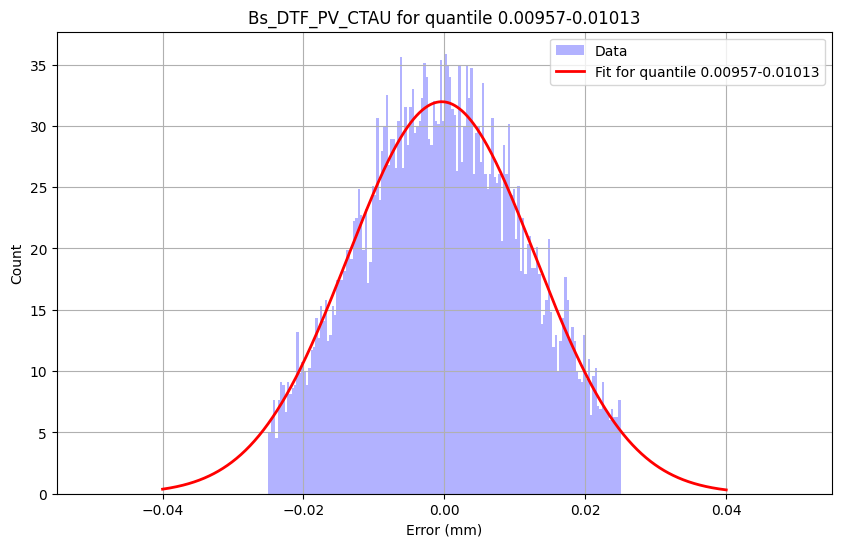

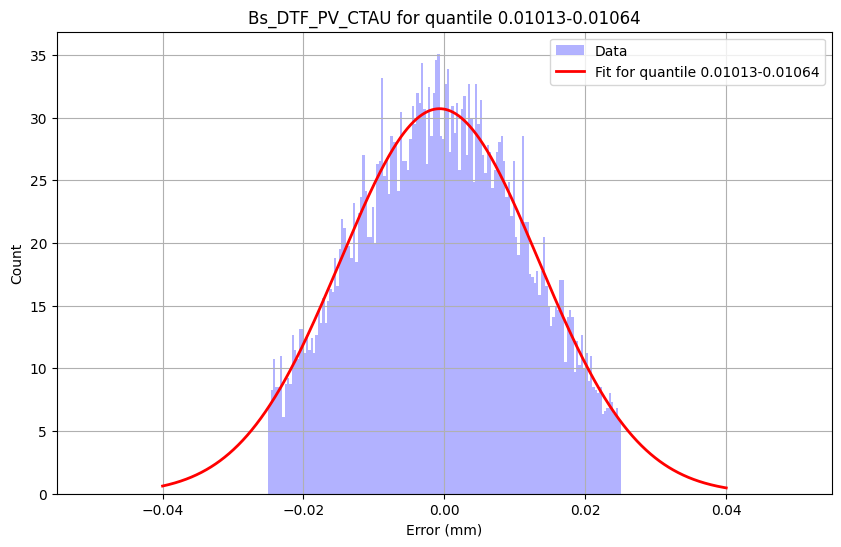

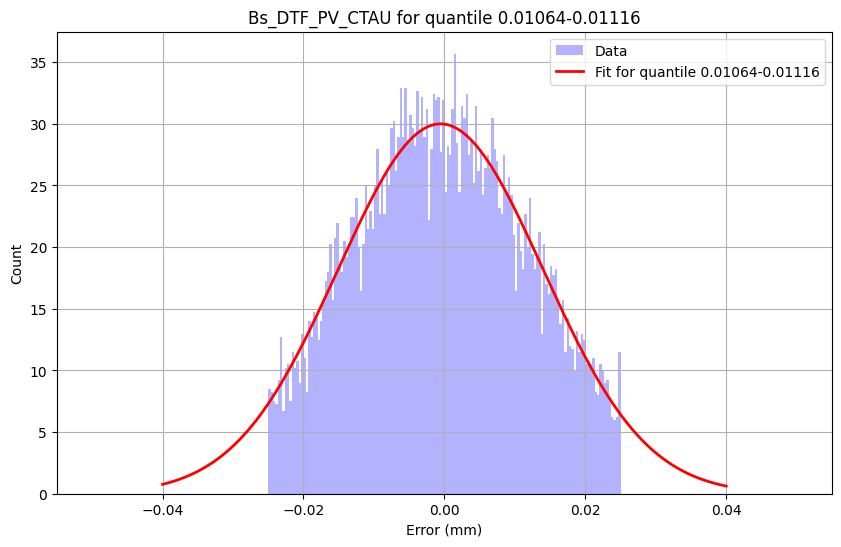

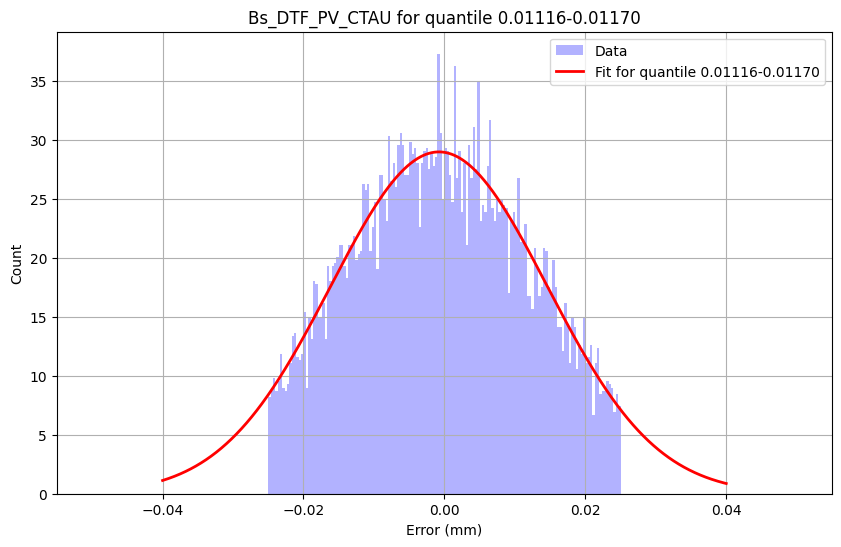

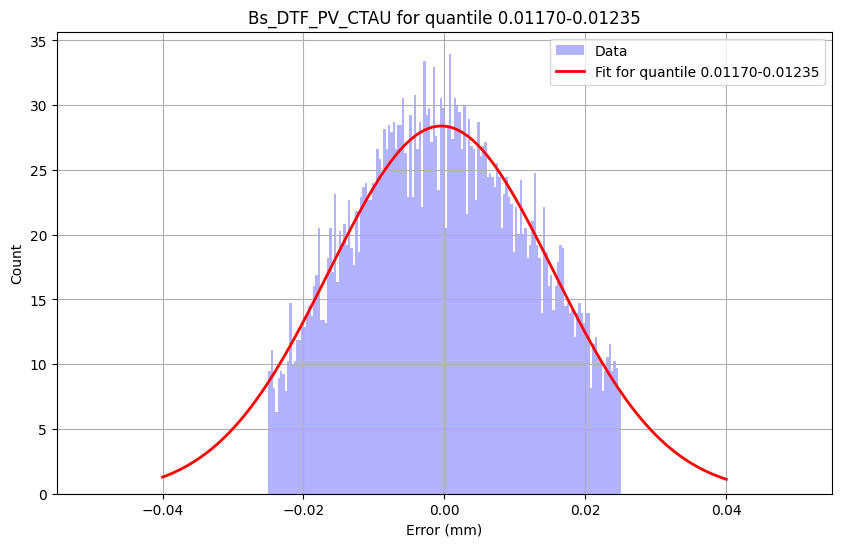

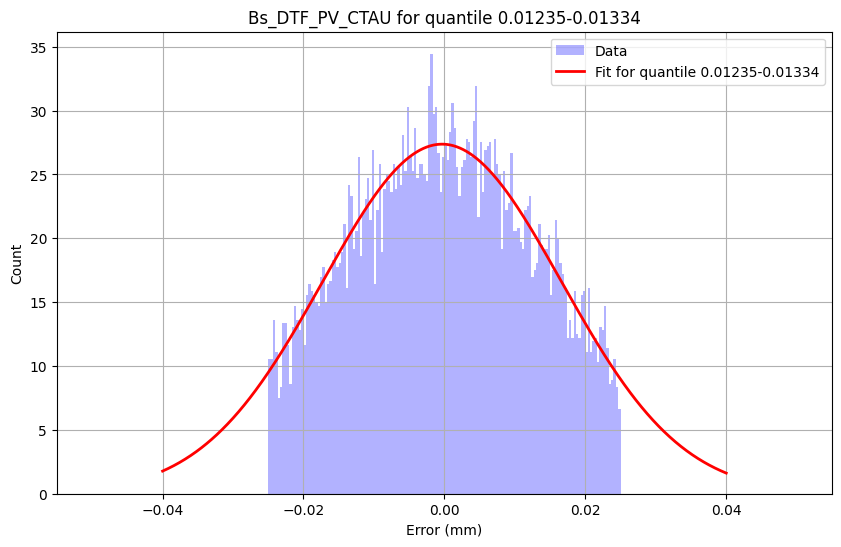

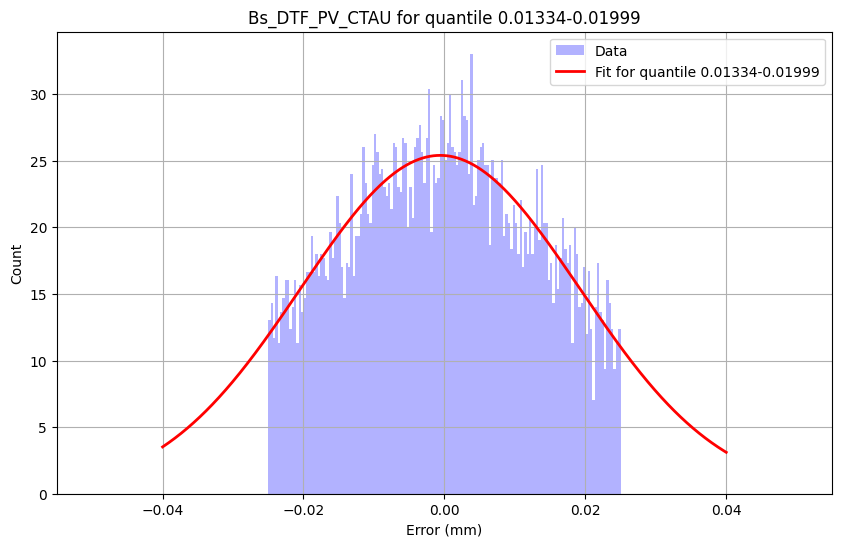

Quantile range: (0.004022281038950106, 0.008043408334783337), Fitted sigma: 0.00942126065363369
Quantile range: (0.008043408334783337, 0.008933473423284887), Fitted sigma: 0.01138808254715351
Quantile range: (0.008933473423284887, 0.009572271123153635), Fitted sigma: 0.012331106680902315
Quantile range: (0.009572271123153635, 0.01012696257723063), Fitted sigma: 0.01327228619246279
Quantile range: (0.01012696257723063, 0.010644672908973061), Fitted sigma: 0.014052249679109008
Quantile range: (0.010644672908973061, 0.011157828894270248), Fitted sigma: 0.014551260092727225
Quantile range: (0.011157828894270248, 0.01169522341888626), Fitted sigma: 0.015386381690619677
Quantile range: (0.01169522341888626, 0.012346387228457538), Fitted sigma: 0.015891919614808292
Quantile range: (0.012346387228457538, 0.0133359468566477), Fitted sigma: 0.016953425040214243
Quantile range: (0.0133359468566477, 0.019993344399180085), Fitted sigma: 0.019808329797047497
-----------------------------------------

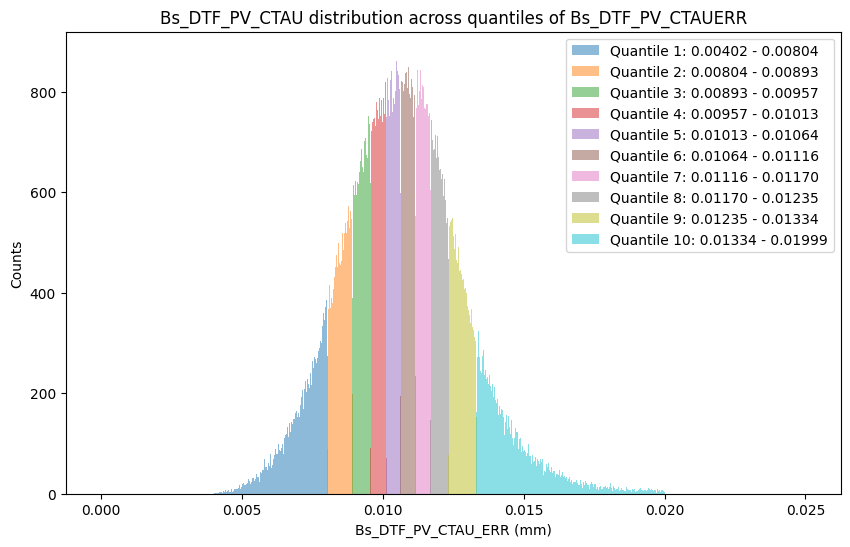

In [22]:
sigmas_prompt, mid_bin_point_prompt, sigma_err_bar_prompt = process_quantiles_sig(quantiles, combined_df_prompt,-0.025,0.025)

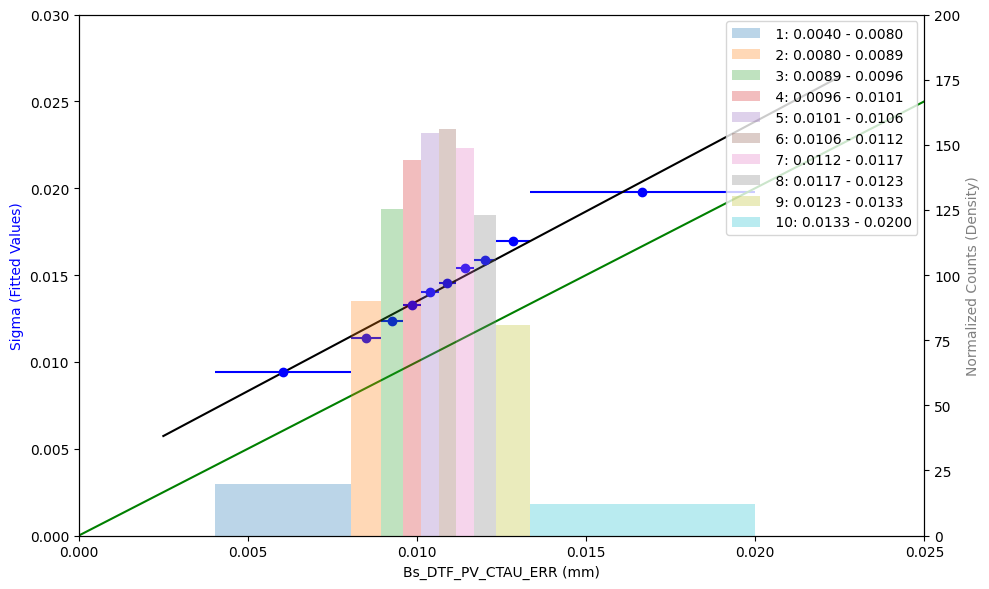

In [23]:
sig_vs_sig_t(quantiles, combined_df_prompt,sigmas_prompt, mid_bin_point_prompt, sigma_err_bar_prompt)
# quantiles,combined_df,sigmas,mid_bin_point,sigma_err_bar 

# MC Prompt Data

In [ ]:
ini_cut = combined_df_mcprompt[(combined_df_mcprompt['Bs_DTF_PV_CTAUERR'] > 0.004) & (combined_df_mcprompt['Bs_DTF_PV_CTAUERR'] < 0.02)]
Ctau_data = ini_cut['Bs_DTF_PV_CTAUERR']
quantiles = np.quantile(Ctau_data, [0,0.1, 0.2,0.3, 0.4, 0.5,0.6,0.7, 0.8,0.9,1])
print(quantiles)

plt.figure(figsize=(10, 6))
plt.hist(Ctau_data  , bins=300, range=(0.003, 0.025), density=True, alpha=0.3, label='Data')
plt.title("Bs_DTF_PV_CTAU")
plt.xlabel("Error (mm)")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.show()